Name: Whitney Brannen

Email: wbranne1@uncc.edu

Open the "early_covid_by_state.csv" file

This file contains early COVID infection data from the first three-ish months of 2020. The numbers contained in each column are a running total of cases reported in that state by that date (meaning that if a state had 40 cases on day 3 and 45 cases on day 4, 5 new cases were reported on day 4). Use this data to create __graphs__ that display the following:

1. Which states had the highest rate of case growth between the first recorded date and the last (by number of cases)?
2. Which states had the highest rate of case growth (by percentage increase) during the last recorded week?
3. During the last recorded week, which states had the highest proportion of new cases nationally?

Make good use of markdowns, and make sure your plots are well-crafted. This is your chance to practice and experiment with different options, for instance:

`
plot = table.plot(kind="area",cmap="Blues",ylim=(0,1),figsize=(14,4))
plot.figure.suptitle("title")
plot.set_xlabel("Date",fontweight="bold")
plot.set_ylabel("cases")
`

## Importing csv file and transforming to be useful for graphing

In [1]:
import numpy as np
import pandas as pd

# make state index column
covid = pd.read_csv("early_covid_by_state.csv", index_col=0) 

# not needed for case data
covid = covid.drop(columns=["Lat","Long"]) 

# drop diamond princess values (were not following a linear increase like others)
covid = covid.drop(index=["NE (From Diamond Princess)", "TX (From Diamond Princess)", "CA (From Diamond Princess)"])

covid.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20
State,,,,,,,,,,,,,,,,,,,,,
AZ,0,0,0,0,1,1,1,1,1,1,...,1,1,1,1,1,1,2,5,5,5
CA,0,0,0,0,2,2,2,2,2,3,...,12,12,21,25,35,51,59,81,98,104
CO,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4,8,8,8
CT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,1,1
D.C.,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2


# <font color= green><center>1. Which states had the highest rate of case growth between the first recorded date and the last (by number of cases)?


Text(0, 0.5, 'Cases')

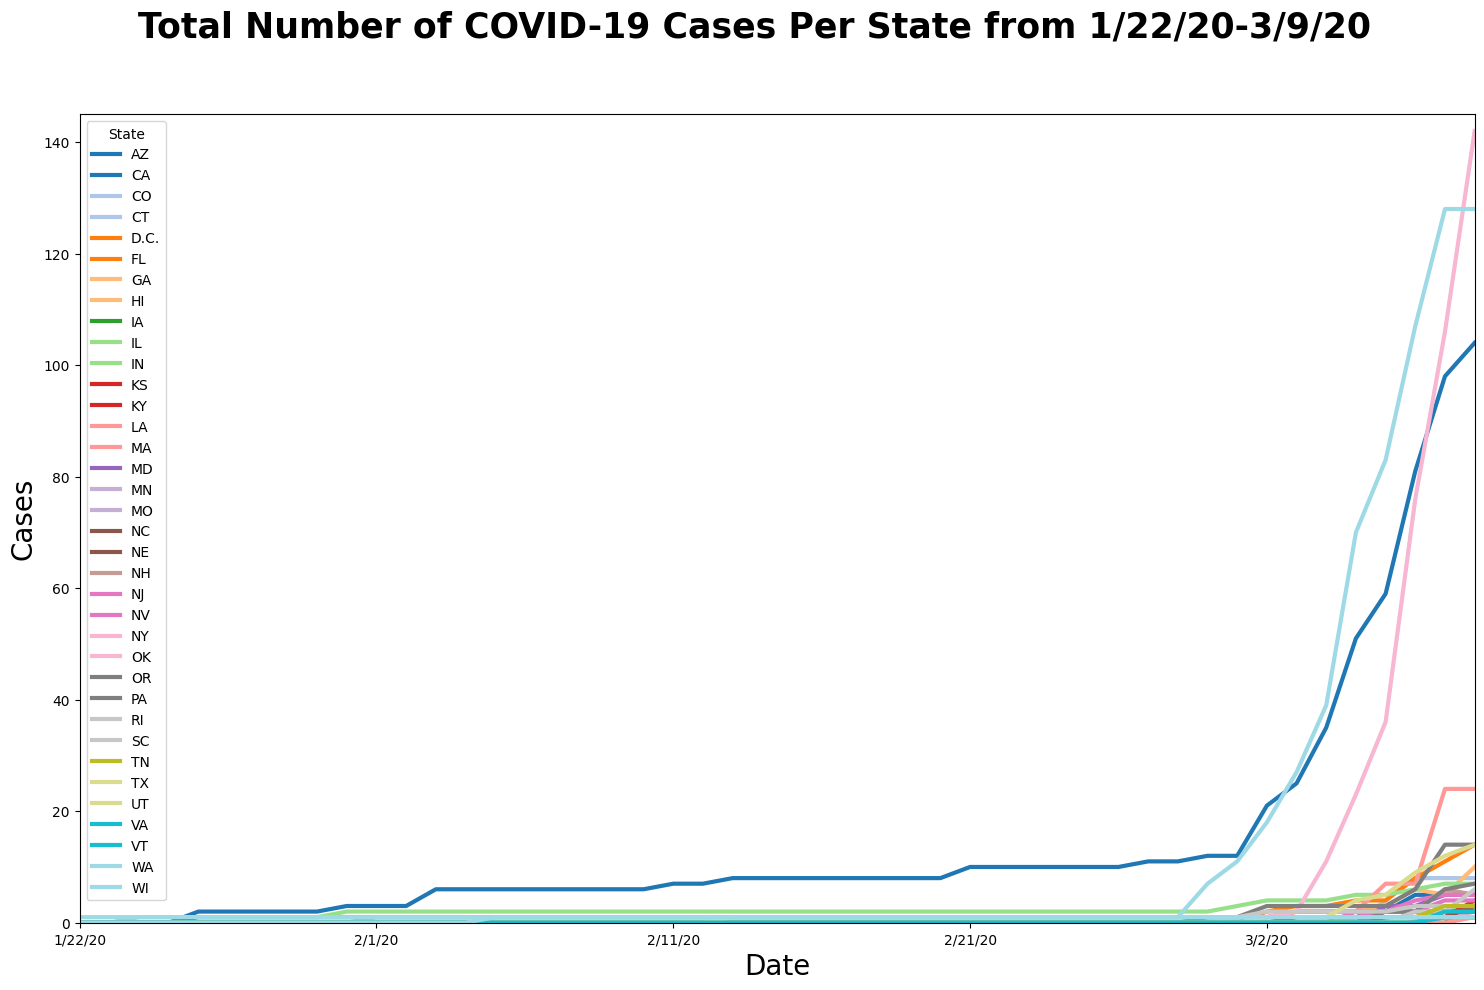

In [134]:
# creating plot, used .T (transform) to get axes/ legend correct
plot1 = covid.T.plot(kind="line",lw=3,cmap="tab20",xlim=(0,47),ylim=(0,145),figsize=(18,10.5)) 
plot1.figure.suptitle("Total Number of COVID-19 Cases Per State from 1/22/20-3/9/20",fontweight="bold",fontsize=25) 
plot1.set_xlabel("Date",fontsize=20) 
plot1.set_ylabel("Cases",fontsize=20)

### <font color = red>According to the graph, the three states with the highest growth from 1/22 to 3/9 by number of cases are NY(pink), WA(light blue), and CA(dark blue).  This can be confirmed by data from the original dataframe below:

In [3]:
# sort ending values from greatest to least to show top states with highest cases
sort = covid[["1/22/20","3/9/20"]].sort_values(by="3/9/20",ascending=False)
sort.head(5)

,1/22/20,3/9/20
State,,
NY,0,142
WA,1,128
CA,0,104
MA,0,24
FL,0,14


### <font color = red> When looking at the graph, New York had the highest rate of growth (steepest slope), next followed by Washington, and lastly California, which has a more steady rate of growth that can be seen by it having the highest number of cases for most of the first two months.

# <font color = green><center>2. Which states had the highest rate of case growth (by percentage increase) during the last recorded week?</center>

In [4]:
# make df from last 8 days (because pct change cannot be calculated on initial day so 
# adding 1 extra for 7 days of pct change values)
last_week = covid[covid.columns[-8:]] 
last_week.head()

,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20
State,,,,,,,,
AZ,1,1,1,1,2,5,5,5
CA,21,25,35,51,59,81,98,104
CO,0,0,0,0,4,8,8,8
CT,0,0,0,0,0,2,1,1
D.C.,0,0,0,0,0,0,2,2


In [5]:
# calculating percent change for each state, replacing Nan and inf values with 0
# the inf or Nan values occur when trying to divide by 0, which is why they are being replaced (% change has to be 0)
pc = last_week.pct_change(axis='columns',periods=1).replace([np.inf],0).fillna(0)

# remove states with 0 % change for cleaner graph (less in the legend)
pc = pc.drop(index=["D.C.","IA","KS","LA","MO","OK","UT","VA","VT","WI"]) 
pc.head()

,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20
State,,,,,,,,
AZ,0.0,0.000000,0.0,0.000000,1.000000,1.500000,0.000000,0.000000
CA,0.0,0.190476,0.4,0.457143,0.156863,0.372881,0.209877,0.061224
CO,0.0,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000
CT,0.0,0.000000,0.0,0.000000,0.000000,0.000000,-0.500000,0.000000
FL,0.0,0.500000,0.0,0.333333,0.000000,1.000000,0.375000,0.272727


Text(0, 0.5, 'Percent Increase (as decimal)')

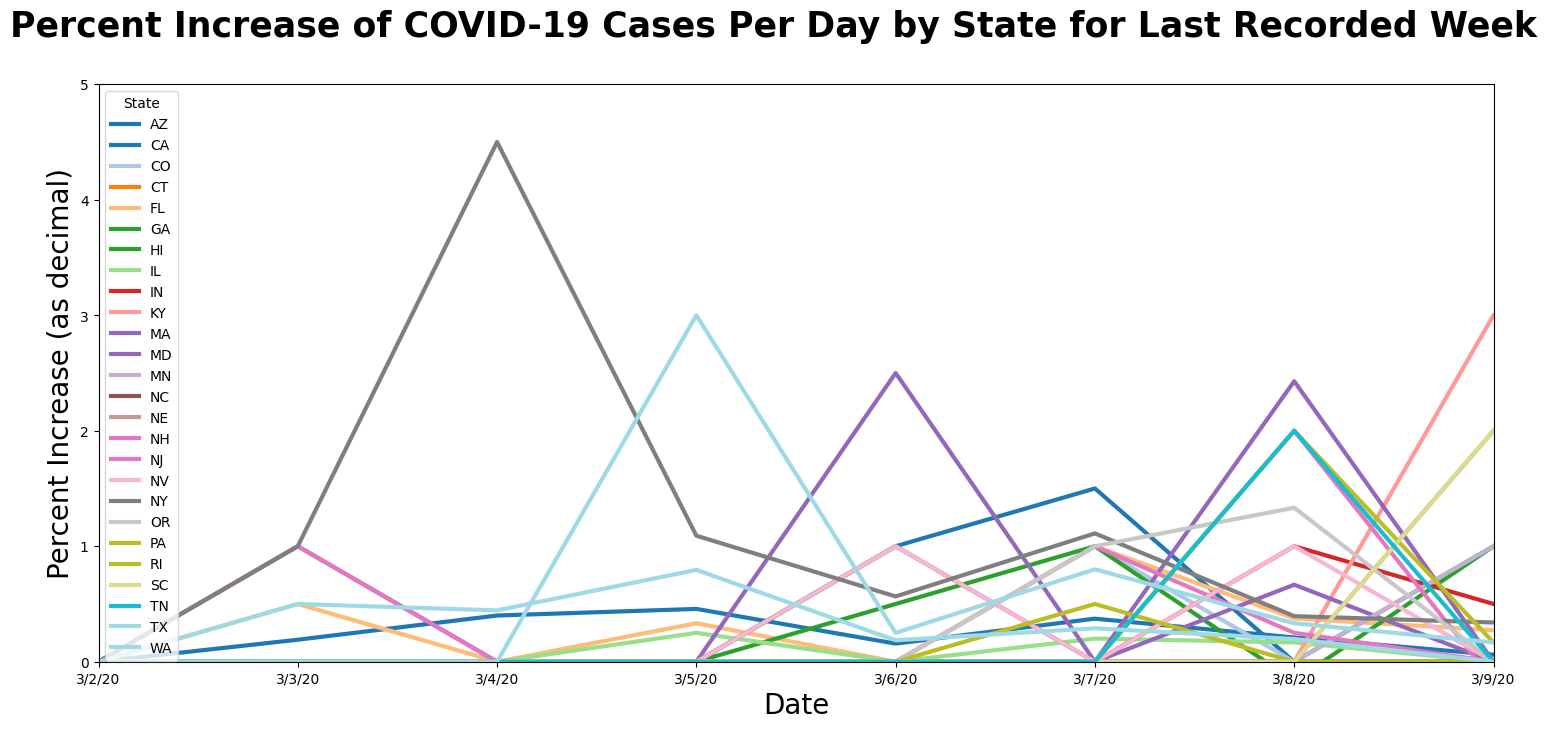

In [39]:
plot2 = pc.T.plot(kind="line",lw=3,cmap="tab20",xlim=(0,7),ylim=(0,5),figsize=(18,7.5)) # did not show negatives because we are looking at increase
plot2.figure.suptitle("Percent Increase of COVID-19 Cases Per Day by State for Last Recorded Week",fontweight="bold",fontsize=25) 
plot2.set_xlabel("Date",fontsize=20) 
plot2.set_ylabel("Percent Increase (as decimal)",fontsize=20)

### <font color=red> The graph above shows the percent increase by state for the last recorded week.  With the help of the dataframe data called below, we can see that the states NY, NH, MA, TX, AZ, and KY has the highest daily rates of case growth.  The highest percent increase occurs in NY on 3/4, with a percent increase in COVID-19 cases of 450%!

In [7]:
# getting the top value(s) per day for each week, which matches with the graph above
print(f'\tDay 1\n{pc["3/3/20"].sort_values(ascending=False).head(3)}\n') # 3 are tied for 100%
print(f'\tDay 2\n{pc["3/4/20"].sort_values(ascending=False).head(1)}\n')
print(f'\tDay 3\n{pc["3/5/20"].sort_values(ascending=False).head(1)}\n')
print(f'\tDay 4\n{pc["3/6/20"].sort_values(ascending=False).head(1)}\n')
print(f'\tDay 5\n{pc["3/7/20"].sort_values(ascending=False).head(1)}\n')
print(f'\tDay 6\n{pc["3/8/20"].sort_values(ascending=False).head(1)}\n')
print(f'\tDay 7\n{pc["3/9/20"].sort_values(ascending=False).head(1)}\n')

	Day 1
State
NH    1.0
NY    1.0
MA    1.0
Name: 3/3/20, dtype: float64

	Day 2
State
NY    4.5
Name: 3/4/20, dtype: float64

	Day 3
State
TX    3.0
Name: 3/5/20, dtype: float64

	Day 4
State
MA    2.5
Name: 3/6/20, dtype: float64

	Day 5
State
AZ    1.5
Name: 3/7/20, dtype: float64

	Day 6
State
MA    2.428571
Name: 3/8/20, dtype: float64

	Day 7
State
KY    3.0
Name: 3/9/20, dtype: float64



# <font color = green><center>3. During the last recorded week, which states had the highest proportion of new cases nationally?


In [126]:
# creating sum of cases for each day
sums = last_week.sum(axis=0) 

# transform and add this to our dataframe
withsums = pd.concat([last_week, sums.to_frame().T]) 

# change index name to "Total" so it is accessible by this index and the date column during calculation
withsums = withsums.rename(index={0: "Total"})  

proportion = pd.DataFrame() # establish empty dataframe for proportion data calculation
for index, col in last_week.T.iterrows(): # iterate through columns of original dataset
    st = [] # creating list of states for index
    val = [] # establising list of proportion values
    for state,num in col.items(): # iterate through state and count values of each column
        st.append(state)
        val.append(num/(withsums.loc["Total",index])) # dividing each state by total for that day
    proportion[index]= pd.Series(val, index=st) # append new columns as a series to dataframe

proportion.head()
        

,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20
AZ,0.017857,0.013158,0.009346,0.005714,0.008621,0.014286,0.010616,0.009276
CA,0.375000,0.328947,0.327103,0.291429,0.254310,0.231429,0.208068,0.192950
CO,0.000000,0.000000,0.000000,0.000000,0.017241,0.022857,0.016985,0.014842
CT,0.000000,0.000000,0.000000,0.000000,0.000000,0.005714,0.002123,0.001855
D.C.,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004246,0.003711


Text(0, 0.5, 'Proportion (as decimal)')

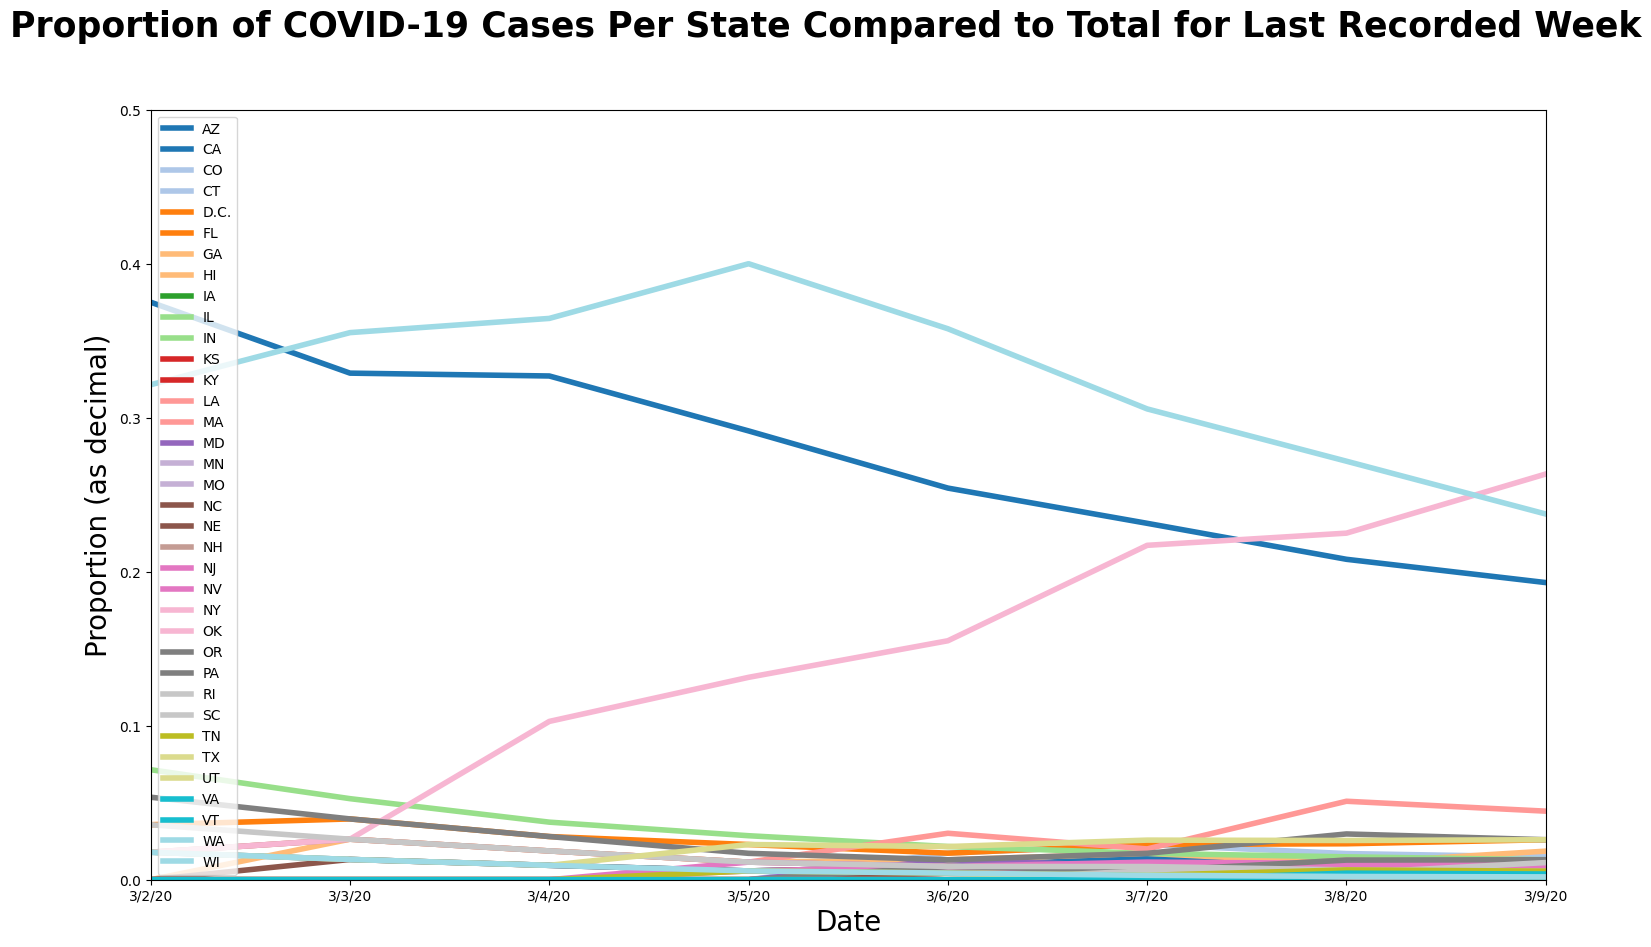

In [133]:
plot3 = proportion.T.plot(kind="line",lw=4,cmap="tab20",xlim=(0,7),ylim=(0,.5),figsize=(18,10)) # did not show negatives because we are looking at increase
plot3.figure.suptitle("Proportion of COVID-19 Cases Per State Compared to Total for Last Recorded Week",fontweight="bold",fontsize=25) 
plot3.set_xlabel("Date",fontsize=20) 
plot3.set_ylabel("Proportion (as decimal)",fontsize=20)

### <font color=red>As seen in the graph above, 23 states primarily make up the highest proportion of COVID-19 cases in the United States (CA, WA, NY) at around 30-40%.  This appears consistent with our graph from Q1, where these 3 states had the highest and quickest rise in case count.  To help interpret the data on the graph, data from the proportion dataframe is called below for each of the 7 days, where CA, WA, and NY appear to dominate:

In [132]:
print(f'\tDay 1\n{proportion["3/3/20"].sort_values(ascending=False).head(3)}\n') 
print(f'\tDay 2\n{proportion["3/4/20"].sort_values(ascending=False).head(3)}\n')
print(f'\tDay 3\n{proportion["3/5/20"].sort_values(ascending=False).head(3)}\n')
print(f'\tDay 4\n{proportion["3/6/20"].sort_values(ascending=False).head(3)}\n')
print(f'\tDay 5\n{proportion["3/7/20"].sort_values(ascending=False).head(3)}\n')
print(f'\tDay 6\n{proportion["3/8/20"].sort_values(ascending=False).head(3)}\n')
print(f'\tDay 7\n{proportion["3/9/20"].sort_values(ascending=False).head(3)}\n')

	Day 1
WA    0.355263
CA    0.328947
IL    0.052632
Name: 3/3/20, dtype: float64

	Day 2
WA    0.364486
CA    0.327103
NY    0.102804
Name: 3/4/20, dtype: float64

	Day 3
WA    0.400000
CA    0.291429
NY    0.131429
Name: 3/5/20, dtype: float64

	Day 4
WA    0.357759
CA    0.254310
NY    0.155172
Name: 3/6/20, dtype: float64

	Day 5
WA    0.305714
CA    0.231429
NY    0.217143
Name: 3/7/20, dtype: float64

	Day 6
WA    0.271762
NY    0.225053
CA    0.208068
Name: 3/8/20, dtype: float64

	Day 7
NY    0.263451
WA    0.237477
CA    0.192950
Name: 3/9/20, dtype: float64

